<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the packages
import pandas as pd
import numpy as np

#visuals
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#datetime
import datetime
from datetime import timedelta

#missing data
from feature_engine.imputation import RandomSampleImputer

#outliers
from feature_engine.imputation import MeanMedianImputer
from feature_engine.outliers import Winsorizer

#train test split
from sklearn.model_selection import train_test_split

#numeric transformation
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

#categorical encoding
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder

#binning / discretization
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

#standradization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

#polynomial expansion
from sklearn.preprocessing import PolynomialFeatures

#pca
from sklearn.decomposition import PCA

#logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Predicting top 6 constructors (position)

## Step 1: Load and Explore the Data

In [2]:
circuit_data = pd.read_csv('./data/circuits_mod.csv')
circuit_data.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [3]:
constructors_data = pd.read_csv('./data/constructors_mod.csv')
constructors_data.head(10)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
5,6,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,7,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing
7,8,super_aguri,Super Aguri,Japanese,http://en.wikipedia.org/wiki/Super_Aguri_F1
8,9,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing
9,10,force_india,Force India,Indian,http://en.wikipedia.org/wiki/Racing_Point_Forc...


In [4]:
races_data = pd.read_csv('./data/races_mod.csv')
races_data.head(10)

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,6,6,6,Monaco Grand Prix,5/24/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,7,7,5,Turkish Grand Prix,6/7/12009,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,8,8,9,British Grand Prix,6/21/2009,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,9,9,20,German Grand Prix,7/12/2009,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,10,10,11,Hungarian Grand Prix,7/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


In [5]:
constructorStanding_data = pd.read_csv('./data/constructor_standings_mod.csv')
constructorStanding_data.head(10)

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
5,6,18,6,1.0,6,6,0
6,7,19,1,24.0,1,1,1
7,8,19,2,19.0,2,2,0
8,9,19,3,9.0,4,4,0
9,10,19,4,6.0,5,5,0


## Step 2: Data Wrangling on multiple tables 

In [6]:
merge_1 = pd.merge(constructorStanding_data,constructors_data,on='constructorId',how='inner')
merge_1.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,18,20,1,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,29,21,1,34.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,40,22,1,42.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [7]:
merge_1 = merge_1.drop(['url'],axis=1)

In [8]:
merge_2 = pd.merge(merge_1,races_data,on='raceId',how='inner')
merge_2 = merge_2.drop(['url','name_x','name_y', 'positionText','time'],axis=1)
merge_2.head()

,constructorStandingsId,raceId,constructorId,points,position,wins,constructorRef,nationality,round,circuitId,date
0,1,18,1,14.0,1,1,mclaren,British,1,1,3/16/2008
1,2,18,2,8.0,3,0,bmw_sauber,German,1,1,3/16/2008
2,3,18,3,9.0,2,0,williams,British,1,1,3/16/2008
3,4,18,4,5.0,4,0,renault,French,1,1,3/16/2008
4,5,18,5,2.0,5,0,toro_rosso,Italian,1,1,3/16/2008


In [9]:
merge_2.count()

constructorStandingsId    12716
raceId                    12716
constructorId             12716
points                    12716
position                  12716
wins                      12716
constructorRef            12716
nationality               12716
round                     12716
circuitId                 12716
date                      12609
dtype: int64

In [10]:
merge_3 = pd.merge(merge_2,circuit_data,on='circuitId',how='inner')
merge_3 = merge_3.drop(['url','lat','lng','name'],axis=1)
merge_3.head(10)

,constructorStandingsId,raceId,constructorId,points,position,wins,constructorRef,nationality,round,circuitId,date,circuitRef,location,country,alt
0,1,18,1,14.0,1,1,mclaren,British,1,1,3/16/2008,albert_park,Melbourne,Australia,10
1,2,18,2,8.0,3,0,bmw_sauber,German,1,1,3/16/2008,albert_park,Melbourne,Australia,10
2,3,18,3,9.0,2,0,williams,British,1,1,3/16/2008,albert_park,Melbourne,Australia,10
3,4,18,4,5.0,4,0,renault,French,1,1,3/16/2008,albert_park,Melbourne,Australia,10
4,5,18,5,2.0,5,0,toro_rosso,Italian,1,1,3/16/2008,albert_park,Melbourne,Australia,10
5,6,18,6,1.0,6,0,ferrari,Italian,1,1,3/16/2008,albert_park,Melbourne,Australia,10
6,6341,55,1,23.0,2,0,mclaren,British,3,1,4/2/2006,albert_park,Melbourne,Australia,10
7,6346,55,2,10.0,5,0,bmw_sauber,German,3,1,4/2/2006,albert_park,Melbourne,Australia,10
8,6343,55,3,5.0,7,0,williams,British,3,1,4/2/2006,albert_park,Melbourne,Australia,10
9,6339,55,4,42.0,1,3,renault,French,3,1,4/2/2006,albert_park,Melbourne,Australia,10


In [11]:
#fix date data before creating new features
def preprocess_date(date_str):
    parts = str(date_str).split('/')
    if len(parts) == 3:
        year = int(parts[2])
        if year > 3000: # for the values with the extra 1
            year -= 10000
            parts[2] = str(year)
    return '/'.join(parts)

# Preprocess and clean date values
merge_3['date'] = merge_3['date'].apply(preprocess_date)
merge_3.head(10)

,constructorStandingsId,raceId,constructorId,points,position,wins,constructorRef,nationality,round,circuitId,date,circuitRef,location,country,alt
0,1,18,1,14.0,1,1,mclaren,British,1,1,3/16/2008,albert_park,Melbourne,Australia,10
1,2,18,2,8.0,3,0,bmw_sauber,German,1,1,3/16/2008,albert_park,Melbourne,Australia,10
2,3,18,3,9.0,2,0,williams,British,1,1,3/16/2008,albert_park,Melbourne,Australia,10
3,4,18,4,5.0,4,0,renault,French,1,1,3/16/2008,albert_park,Melbourne,Australia,10
4,5,18,5,2.0,5,0,toro_rosso,Italian,1,1,3/16/2008,albert_park,Melbourne,Australia,10
5,6,18,6,1.0,6,0,ferrari,Italian,1,1,3/16/2008,albert_park,Melbourne,Australia,10
6,6341,55,1,23.0,2,0,mclaren,British,3,1,4/2/2006,albert_park,Melbourne,Australia,10
7,6346,55,2,10.0,5,0,bmw_sauber,German,3,1,4/2/2006,albert_park,Melbourne,Australia,10
8,6343,55,3,5.0,7,0,williams,British,3,1,4/2/2006,albert_park,Melbourne,Australia,10
9,6339,55,4,42.0,1,3,renault,French,3,1,4/2/2006,albert_park,Melbourne,Australia,10


In [12]:
merge_3['date'] = pd.to_datetime(merge_3['date'], format='%m/%d/%Y')
merge_3['date'].dtype
merge_3['year'] = merge_3['date'].dt.year
merge_3['month'] = merge_3['date'].dt.month
merge_3['day_mo'] = merge_3['date'].dt.day
merge_3['day_week'] = merge_3['date'].dt.dayofweek

merge_3.head()

,constructorStandingsId,raceId,constructorId,points,position,wins,constructorRef,nationality,round,circuitId,date,circuitRef,location,country,alt,year,month,day_mo,day_week
0,1,18,1,14.0,1,1,mclaren,British,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0
1,2,18,2,8.0,3,0,bmw_sauber,German,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0
2,3,18,3,9.0,2,0,williams,British,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0
3,4,18,4,5.0,4,0,renault,French,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0
4,5,18,5,2.0,5,0,toro_rosso,Italian,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0


In [13]:
merge_3['year'].max()

2022.0

In [14]:
merge_3.groupby('raceId')['points'].mean()

raceId
1         4.333333
2         5.850000
3         9.750000
4        13.650000
5        17.550000
           ...    
1070    179.350000
1071    190.150000
1072    210.550000
1073    220.750000
1074      0.000000
Name: points, Length: 994, dtype: float64

In [15]:
mean_points = pd.DataFrame()
mean_points['mean_points_of_race'] = merge_3.groupby('raceId')['points'].mean()
mean_points.head()

,mean_points_of_race
raceId,
1,4.333333
2,5.850000
3,9.750000
4,13.650000
5,17.550000


In [16]:
merge_4 = pd.merge(merge_3,mean_points,on='raceId',how='inner')
merge_4.head()

,constructorStandingsId,raceId,constructorId,points,position,wins,constructorRef,nationality,round,circuitId,date,circuitRef,location,country,alt,year,month,day_mo,day_week,mean_points_of_race
0,1,18,1,14.0,1,1,mclaren,British,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.5
1,2,18,2,8.0,3,0,bmw_sauber,German,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.5
2,3,18,3,9.0,2,0,williams,British,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.5
3,4,18,4,5.0,4,0,renault,French,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.5
4,5,18,5,2.0,5,0,toro_rosso,Italian,1,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.5


In [17]:
#See if constructor has a better score than average which will help predict whether they are in the top 6

def higher_than_mean(row):
    if row['points'] > row['mean_points_of_race']:
        return 1
    else:
        return 0

merge_4['higher_than_mean'] = merge_4.apply(higher_than_mean, axis=1)
merge_4.head(10)

,constructorStandingsId,raceId,constructorId,points,position,wins,constructorRef,nationality,round,circuitId,...,circuitRef,location,country,alt,year,month,day_mo,day_week,mean_points_of_race,higher_than_mean
0,1,18,1,14.0,1,1,mclaren,British,1,1,...,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,1
1,2,18,2,8.0,3,0,bmw_sauber,German,1,1,...,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,1
2,3,18,3,9.0,2,0,williams,British,1,1,...,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,1
3,4,18,4,5.0,4,0,renault,French,1,1,...,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,0
4,5,18,5,2.0,5,0,toro_rosso,Italian,1,1,...,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,0
5,6,18,6,1.0,6,0,ferrari,Italian,1,1,...,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,0
6,6341,55,1,23.0,2,0,mclaren,British,3,1,...,albert_park,Melbourne,Australia,10,2006.0,4.0,2.0,6.0,10.636364,1
7,6346,55,2,10.0,5,0,bmw_sauber,German,3,1,...,albert_park,Melbourne,Australia,10,2006.0,4.0,2.0,6.0,10.636364,0
8,6343,55,3,5.0,7,0,williams,British,3,1,...,albert_park,Melbourne,Australia,10,2006.0,4.0,2.0,6.0,10.636364,0
9,6339,55,4,42.0,1,3,renault,French,3,1,...,albert_park,Melbourne,Australia,10,2006.0,4.0,2.0,6.0,10.636364,1


In [18]:
merge_4.groupby('constructorId')['wins'].sum()

constructorId
1      1604
2        12
3       934
4       352
5         5
       ... 
209       0
210       0
211       2
213      10
214      12
Name: wins, Length: 159, dtype: int64

In [19]:
# a team with more wins overall is more successful, possibly increasing the chance they will be in the top 6
sum_of_wins = pd.DataFrame()
sum_of_wins['sum_of_wins'] = merge_4.groupby('constructorId')['wins'].sum()
sum_of_wins.head()

,sum_of_wins
constructorId,
1,1604
2,12
3,934
4,352
5,5


In [20]:
merge_5 = pd.merge(merge_4,sum_of_wins,on='constructorId',how='inner')

In [21]:
# creating target column
# constructors who achieve top 6 will be labelled as 1, the rest as 0

def top_6(row):
    if row['position'] <= 6:
        return 1
    else:
        return 0
    
merge_5['target'] = merge_5.apply(top_6, axis=1)

0    6755
1    5961
Name: target, dtype: int64


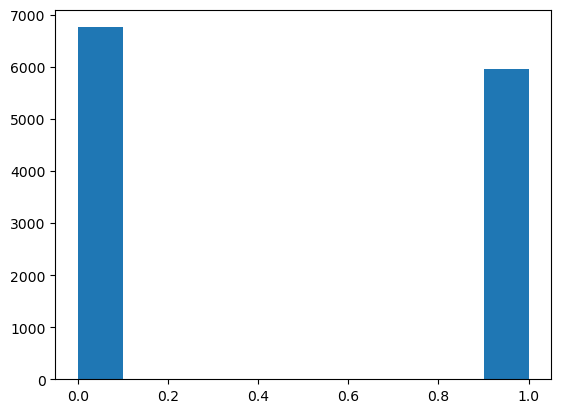

In [22]:
# visualising the ratio of 1s to 0s

print(merge_5['target'].value_counts())
plt.hist(merge_5['target'])
plt.show() 

In [23]:
merge_5 = merge_5.drop(['constructorStandingsId','constructorId','position','circuitId','raceId'],axis=1)
merge_5.head()

,points,wins,constructorRef,nationality,round,date,circuitRef,location,country,alt,year,month,day_mo,day_week,mean_points_of_race,higher_than_mean,sum_of_wins,target
0,14.0,1,mclaren,British,1,2008-03-16,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,1,1604,1
1,23.0,0,mclaren,British,3,2006-04-02,albert_park,Melbourne,Australia,10,2006.0,4.0,2.0,6.0,10.636364,1,1604,1
2,4.0,0,mclaren,British,1,2005-03-06,albert_park,Melbourne,Australia,10,2005.0,3.0,6.0,6.0,4.333333,0,1604,1
3,1.0,0,mclaren,British,1,2004-03-07,albert_park,Melbourne,Australia,10,2004.0,3.0,7.0,6.0,4.333333,0,1604,1
4,16.0,1,mclaren,British,1,2003-03-09,albert_park,Melbourne,Australia,10,2003.0,3.0,9.0,6.0,5.571429,1,1604,1


In [24]:
print(merge_5.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12716 entries, 0 to 12715
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   points               12716 non-null  float64       
 1   wins                 12716 non-null  int64         
 2   constructorRef       12716 non-null  object        
 3   nationality          12716 non-null  object        
 4   round                12716 non-null  int64         
 5   date                 12609 non-null  datetime64[ns]
 6   circuitRef           12716 non-null  object        
 7   location             12716 non-null  object        
 8   country              12716 non-null  object        
 9   alt                  12716 non-null  object        
 10  year                 12609 non-null  float64       
 11  month                12609 non-null  float64       
 12  day_mo               12609 non-null  float64       
 13  day_week             12609 non-

In [25]:
merge_5.describe()

,points,wins,round,year,month,day_mo,day_week,mean_points_of_race,higher_than_mean,sum_of_wins,target
count,12716.000000,12716.000000,12716.000000,12609.000000,12609.000000,12609.000000,12609.000000,12716.000000,12716.000000,12716.000000,12716.000000
mean,32.244299,0.671044,8.715870,1991.064002,6.950591,15.710207,5.911095,32.244299,0.315823,397.582888,0.468779
std,73.503280,1.788436,4.858019,16.995225,2.401060,9.059830,0.496605,42.431094,0.464861,625.250960,0.499044
min,0.000000,0.000000,1.000000,1958.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,1978.000000,5.000000,8.000000,6.000000,8.750000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,8.000000,1990.000000,7.000000,15.000000,6.000000,15.789474,0.000000,19.000000,0.000000
75%,29.125000,0.000000,13.000000,2006.000000,9.000000,24.000000,6.000000,31.200000,1.000000,714.000000,1.000000
max,765.000000,19.000000,22.000000,2022.000000,12.000000,31.000000,6.000000,220.750000,1.000000,1856.000000,1.000000


## Step 3: Data Cleansing and Transformation

### Missing Data

In [26]:
merge_5.isnull().mean()
# a very small portion of the data is missing

points                 0.000000
wins                   0.000000
constructorRef         0.000000
nationality            0.000000
round                  0.000000
date                   0.008415
circuitRef             0.000000
location               0.000000
country                0.000000
alt                    0.000000
year                   0.008415
month                  0.008415
day_mo                 0.008415
day_week               0.008415
mean_points_of_race    0.000000
higher_than_mean       0.000000
sum_of_wins            0.000000
target                 0.000000
dtype: float64

#### Date Variables

In [27]:
merge_5 = merge_5.dropna()
merge_5.isnull().mean()

points                 0.0
wins                   0.0
constructorRef         0.0
nationality            0.0
round                  0.0
date                   0.0
circuitRef             0.0
location               0.0
country                0.0
alt                    0.0
year                   0.0
month                  0.0
day_mo                 0.0
day_week               0.0
mean_points_of_race    0.0
higher_than_mean       0.0
sum_of_wins            0.0
target                 0.0
dtype: float64

In [28]:
merge_5.isnull().mean()

points                 0.0
wins                   0.0
constructorRef         0.0
nationality            0.0
round                  0.0
date                   0.0
circuitRef             0.0
location               0.0
country                0.0
alt                    0.0
year                   0.0
month                  0.0
day_mo                 0.0
day_week               0.0
mean_points_of_race    0.0
higher_than_mean       0.0
sum_of_wins            0.0
target                 0.0
dtype: float64

In [29]:
merge_5 = merge_5.drop(['date'],axis=1)

#### Alt Variable

In [30]:
# convert all \N to nan
merge_5.replace(r'\N' , np.nan, inplace=True)

##### Median Imputation

In [31]:
# missing indicator

merge_5['alt'+'_NA'] = np.where(merge_5['alt'].isnull(), 1, 0)

merge_5['alt'].isnull().mean(), merge_5['alt_NA'].mean()

(0.0007930843048616068, 0.0007930843048616068)

In [32]:
# mean / median imputation
# add missing indicator

value = merge_5['alt'].median()
print(value)

merge_5['alt'] = merge_5['alt'].fillna(value)


merge_5['alt'] = merge_5['alt'].astype(int)
merge_5.head()

153.0


,points,wins,constructorRef,nationality,round,circuitRef,location,country,alt,year,month,day_mo,day_week,mean_points_of_race,higher_than_mean,sum_of_wins,target,alt_NA
0,14.0,1,mclaren,British,1,albert_park,Melbourne,Australia,10,2008.0,3.0,16.0,6.0,6.500000,1,1604,1,0
1,23.0,0,mclaren,British,3,albert_park,Melbourne,Australia,10,2006.0,4.0,2.0,6.0,10.636364,1,1604,1,0
2,4.0,0,mclaren,British,1,albert_park,Melbourne,Australia,10,2005.0,3.0,6.0,6.0,4.333333,0,1604,1,0
3,1.0,0,mclaren,British,1,albert_park,Melbourne,Australia,10,2004.0,3.0,7.0,6.0,4.333333,0,1604,1,0
4,16.0,1,mclaren,British,1,albert_park,Melbourne,Australia,10,2003.0,3.0,9.0,6.0,5.571429,1,1604,1,0


In [33]:
merge_5.isnull().mean()

points                 0.0
wins                   0.0
constructorRef         0.0
nationality            0.0
round                  0.0
circuitRef             0.0
location               0.0
country                0.0
alt                    0.0
year                   0.0
month                  0.0
day_mo                 0.0
day_week               0.0
mean_points_of_race    0.0
higher_than_mean       0.0
sum_of_wins            0.0
target                 0.0
alt_NA                 0.0
dtype: float64

##### Random Sampling

In [34]:
#number_missing_values = merge_5['alt'].isnull().sum()
#number_missing_values

In [35]:
#random_sample_train = merge_5['alt'].dropna().sample(number_missing_values, random_state=0)

In [36]:
#random_sample_train.index = merge_5[merge_5['alt'].isnull()].index
#random_sample_train

In [37]:
#merge_5.loc[merge_5['alt'].isnull(), 'alt'] = random_sample_train
#merge_5['alt'] = merge_5['alt'].astype(int)
#merge_5.isnull().mean()

### Outlier Removal / Capping

In [38]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\3109233369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


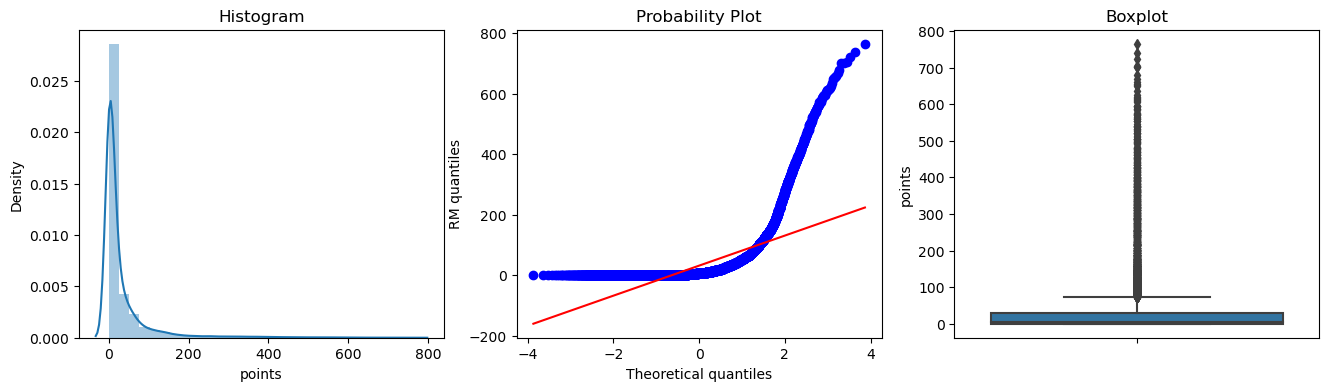

In [39]:
diagnostic_plots(merge_5, 'points')

Lots of outliers, extremely positively skewed distribution. 
Due to the amount of outliers, it may not be suitable to use trimming

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\3109233369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


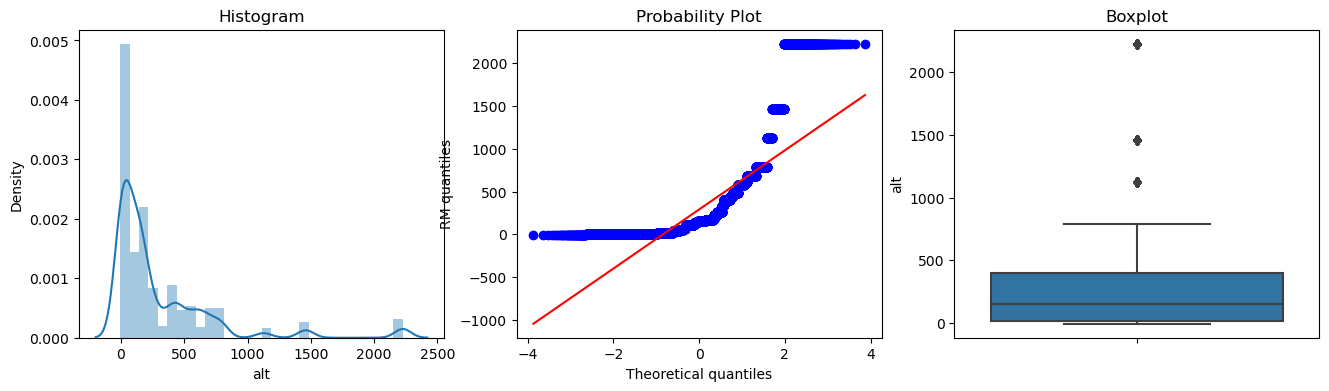

In [40]:
diagnostic_plots(merge_5, 'alt')

A few outliers, not a normal distribution

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\3109233369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


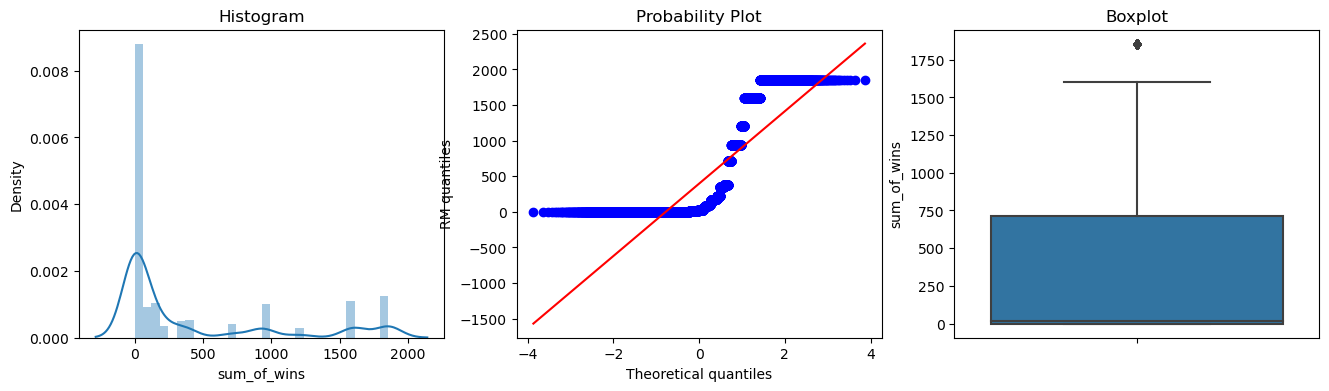

In [41]:
diagnostic_plots(merge_5, 'sum_of_wins')

Probability Plot is good, but not normal distribution

#### Trimming

In [42]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

upper_limit, lower_limit = find_boundaries(merge_5, 'points', 1.5)
upper_limit, lower_limit

(72.5, -43.5)

In [43]:
outliers = np.where(merge_5['points'] > upper_limit, True,
                       np.where(merge_5['points'] < lower_limit, True, False))

In [44]:
outlier_trimmed = merge_5.loc[~outliers]

In [45]:
print('Number of total rows: {}'.format(len(merge_5)))
print('Number of rows after trimming: {}'.format(len(outlier_trimmed)))
print('Rows lost: {}'.format(len(merge_5) - len(outlier_trimmed)))

Number of total rows: 12609
Number of rows after trimming: 11184
Rows lost: 1425


#### Windsorization

In [46]:
windsorizer = Winsorizer(capping_method ='iqr', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['points', 'alt', 'sum_of_wins'])

windsorizer.fit(merge_5)

Winsorizer(capping_method='iqr', fold=0.05, tail='both',
           variables=['points', 'alt', 'sum_of_wins'])

In [47]:
windsorizer_data = windsorizer.transform(merge_5)

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\3109233369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


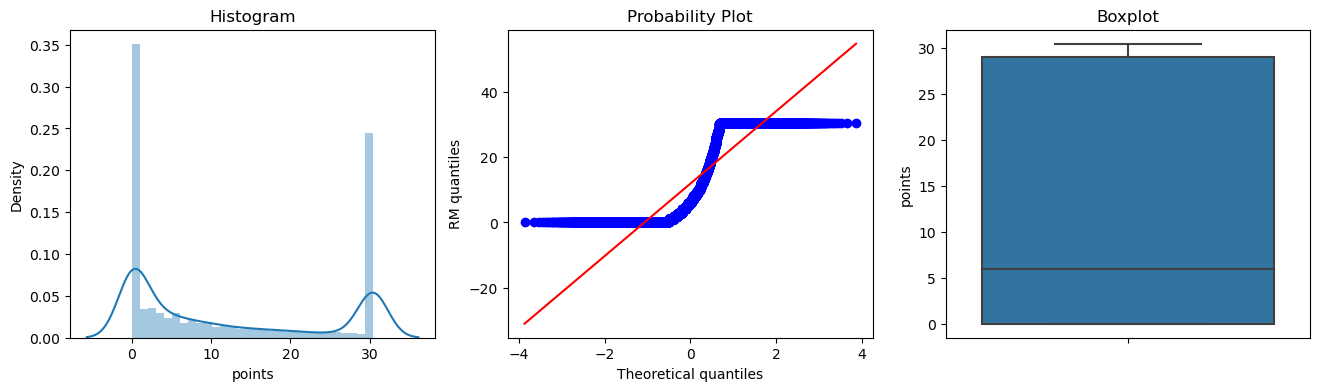

In [48]:
diagnostic_plots(windsorizer_data, 'points')

#### Capping

In [49]:
windsorizer = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['points', 'alt', 'sum_of_wins'])

windsorizer.fit(merge_5)

Winsorizer(capping_method='iqr', tail='both',
           variables=['points', 'alt', 'sum_of_wins'])

In [50]:
capping_data = windsorizer.transform(merge_5)

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\3109233369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


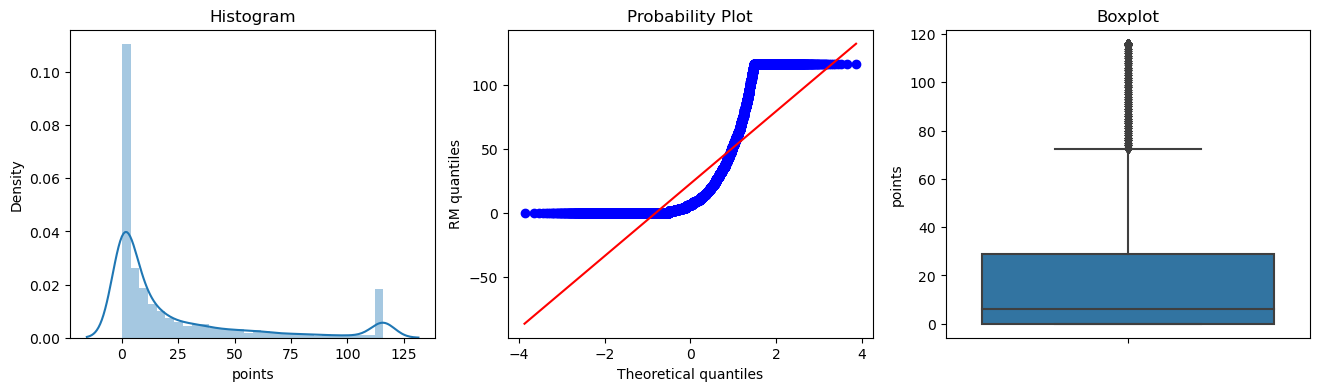

In [51]:
diagnostic_plots(capping_data, 'points')

### Train and Test Split

In [52]:
capping_data.isnull().mean()

points                 0.0
wins                   0.0
constructorRef         0.0
nationality            0.0
round                  0.0
circuitRef             0.0
location               0.0
country                0.0
alt                    0.0
year                   0.0
month                  0.0
day_mo                 0.0
day_week               0.0
mean_points_of_race    0.0
higher_than_mean       0.0
sum_of_wins            0.0
target                 0.0
alt_NA                 0.0
dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    capping_data.drop('target', axis=1), merge_5['target'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((8826, 17), (3783, 17))

In [54]:
X_train.isnull().mean()

points                 0.0
wins                   0.0
constructorRef         0.0
nationality            0.0
round                  0.0
circuitRef             0.0
location               0.0
country                0.0
alt                    0.0
year                   0.0
month                  0.0
day_mo                 0.0
day_week               0.0
mean_points_of_race    0.0
higher_than_mean       0.0
sum_of_wins            0.0
alt_NA                 0.0
dtype: float64

In [55]:
print(X_train.index)
print(y_train.index)
X_train.index == y_train.index

Int64Index([ 3018,  8501,  4317,  1857,  5786,  5969, 10583,   388, 11114,
             2223,
            ...
             6822,  5948,  4443,  7997,  9331,  4931,  3310,  9951, 10905,
             2773],
           dtype='int64', length=8826)
Int64Index([ 3018,  8501,  4317,  1857,  5786,  5969, 10583,   388, 11114,
             2223,
            ...
             6822,  5948,  4443,  7997,  9331,  4931,  3310,  9951, 10905,
             2773],
           dtype='int64', length=8826)


array([ True,  True,  True, ...,  True,  True,  True])

###  Numerical Data Transformation

#### Power

In [56]:
#et = PowerTransformer(variables = ['points', 'alt', 'sum_of_wins'], exp=1/9)

#fit transformer to data
#et.fit(X_train)

In [57]:
#X_train = et.transform(X_train)
#X_test = et.transform(X_test)

In [58]:
#X_train['alt'].unique() 

In [59]:
#X_train.isnull().mean()

In [60]:
#diagnostic_plots(X_train, 'alt')

#### Yeo-Johnson

In [61]:
yjt = YeoJohnsonTransformer(variables = ['points', 'alt', 'sum_of_wins'])

# fit transformer to the dataframe
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['points', 'alt', 'sum_of_wins'])

In [62]:
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\3109233369.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


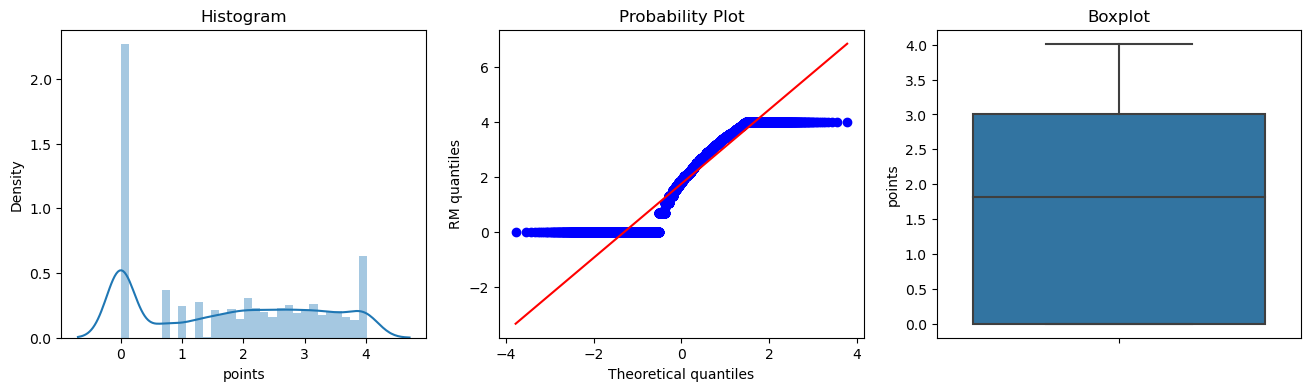

In [63]:
diagnostic_plots(X_train, 'points')

###  Categorical Data Encoding

In [64]:
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
X_train[cat_cols]

,constructorRef,nationality,circuitRef,location,country
3018,ferrari,Italian,suzuka,Suzuka,Japan
8501,team_lotus,British,imola,Imola,Italy
4317,sauber,Swiss,suzuka,Suzuka,Japan
1857,renault,French,hockenheimring,Hockenheim,Germany
5786,prost,French,indianapolis,Indianapolis,USA
...,...,...,...,...,...
4931,minardi,Italian,estoril,Estoril,Portugal
3310,ferrari,Italian,yas_marina,Abu Dhabi,UAE
9951,ram,British,imola,Imola,Italy
10905,surtees,British,ricard,Le Castellet,France


#### Grouping Rare Categories

In [65]:
def find_frequent_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts()  / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

##### ConstructorRef

In [66]:
X_train['constructorRef'].value_counts() / len(X_train)

ferrari              0.076592
mclaren              0.067868
williams             0.062429
tyrrell              0.034897
renault              0.033311
                       ...   
kojima               0.000227
cooper-osca          0.000113
cooper-alfa_romeo    0.000113
stebro               0.000113
kurtis_kraft         0.000113
Name: constructorRef, Length: 158, dtype: float64

In [67]:
frequent_cat = find_frequent_labels(X_train, 'constructorRef', 0.01)

frequent_cat

['ferrari',
 'mclaren',
 'williams',
 'tyrrell',
 'renault',
 'team_lotus',
 'sauber',
 'minardi',
 'ligier',
 'red_bull',
 'brabham',
 'arrows',
 'benetton',
 'toro_rosso',
 'brm',
 'jordan',
 'mercedes',
 'force_india',
 'march',
 'osella',
 'alfa',
 'toyota',
 'ensign',
 'lola',
 'fittipaldi']

In [68]:
[x for x in X_train['constructorRef'].unique() if x not in frequent_cat]

['prost',
 'shadow',
 'cooper-climax',
 'eurobrun',
 'haas',
 'hill',
 'lotus_f1',
 'racing_point',
 'spyker',
 'bar',
 'honda',
 'jaguar',
 'lotus-ford',
 'zakspeed',
 'lotus-brm',
 'simtek',
 'toleman',
 'ats',
 'surtees',
 'footwork',
 'onyx',
 'brabham-climax',
 'protos',
 'life',
 'cooper-maserati',
 'scarab',
 'osca',
 'amon',
 'scirocco',
 'forti',
 'matra',
 'vanwall',
 'spyker_mf1',
 'cooper-brm',
 'brabham-alfa_romeo',
 'shadow-ford',
 'hesketh',
 'caterham',
 'larrousse',
 'leyton',
 'lotus-borgward',
 'brabham-ford',
 'ags',
 'ram',
 'trojan',
 'brp',
 'coloni',
 'alpine',
 'matra-ford',
 'tecno',
 'virgin',
 'stewart',
 'theodore',
 'cooper-castellotti',
 'cooper-ats',
 'marussia',
 'manor',
 'lds',
 'lotus_racing',
 'dallara',
 'maserati',
 'token',
 'super_aguri',
 'lambo',
 'bmw_sauber',
 'wolf',
 'brabham-repco',
 'penske',
 'brabham-brm',
 'rial',
 'mclaren-brm',
 'mclaren-ford',
 'hrt',
 'tomaso',
 'porsche',
 'march-ford',
 'jbw',
 'lotus-climax',
 'martini',
 'gilb

In [69]:
X_train['constructorRef'] = np.where(X_train['constructorRef'].isin(frequent_cat), X_train['constructorRef'], 'Others')
    
X_test['constructorRef'] = np.where(X_test['constructorRef'].isin(frequent_cat), X_test['constructorRef'], 'Others')

In [70]:
len(X_train['constructorRef'].value_counts() / len(X_train))

26

##### Circuit Ref

In [71]:
X_train['circuitRef'].value_counts() / len(X_train)

monza          0.066735
monaco         0.060503
silverstone    0.049513
spa            0.047360
villeneuve     0.041015
                 ...   
losail         0.000906
jeddah         0.000906
mugello        0.000793
avus           0.000793
ain-diab       0.000793
Name: circuitRef, Length: 73, dtype: float64

In [72]:
frequent_cat = find_frequent_labels(X_train, 'circuitRef', 0.01)

frequent_cat

['monza',
 'monaco',
 'silverstone',
 'spa',
 'villeneuve',
 'nurburgring',
 'hockenheimring',
 'hungaroring',
 'interlagos',
 'suzuka',
 'zandvoort',
 'osterreichring',
 'imola',
 'catalunya',
 'watkins_glen',
 'rodriguez',
 'ricard',
 'kyalami',
 'brands_hatch',
 'sepang',
 'magny_cours',
 'bahrain',
 'estoril',
 'albert_park',
 'adelaide',
 'galvez',
 'zolder',
 'shanghai',
 'jacarepagua',
 'long_beach',
 'marina_bay',
 'yas_marina',
 'mosport']

In [73]:
[x for x in X_train['circuitRef'].unique() if x not in frequent_cat]

['indianapolis',
 'jarama',
 'portimao',
 'red_bull_ring',
 'montjuic',
 'anderstorp',
 'reims',
 'sochi',
 'jerez',
 'okayama',
 'george',
 'nivelles',
 'lemans',
 'BAK',
 'essarts',
 'tremblant',
 'zeltweg',
 'detroit',
 'jeddah',
 'phoenix',
 'charade',
 'losail',
 'buddh',
 'yeongam',
 'monsanto',
 'americas',
 'valencia',
 'istanbul',
 'dijon',
 'mugello',
 'fuji',
 'avus',
 'donington',
 'aintree',
 'las_vegas',
 'sebring',
 'dallas',
 'ain-diab',
 'boavista',
 'riverside']

In [74]:
X_train['circuitRef'] = np.where(X_train['circuitRef'].isin(frequent_cat), X_train['circuitRef'], 'Others')
    
X_test['circuitRef'] = np.where(X_test['circuitRef'].isin(frequent_cat), X_test['circuitRef'], 'Others')

In [75]:
len(X_train['circuitRef'].value_counts() / len(X_train))

34

##### Nationality

In [76]:
X_train['nationality'].value_counts() / len(X_train)
#print(len(X_train['nationality'].value_counts() / len(X_train)))

British          0.476320
Italian          0.203830
French           0.090301
Swiss            0.042715
German           0.038296
Austrian         0.025946
Japanese         0.023680
American         0.019148
Irish            0.018015
Indian           0.015976
Brazilian        0.010084
Malaysian        0.005892
Russian          0.005778
Canadian         0.005099
Hong Kong        0.004985
Spanish          0.003966
Dutch            0.003286
South African    0.003172
New Zealand      0.001133
Rhodesian        0.001020
Australian       0.000793
Belgium          0.000340
Mexican          0.000227
Name: nationality, dtype: float64

In [77]:
#frequent_cat = find_frequent_labels(X_train, 'nationality', 0.01)
#[x for x in X_train['nationality'].unique() if x not in frequent_cat]

In [78]:
#X_train['nationality'] = np.where(X_train['nationality'].isin(frequent_cat), X_train['nationality'], 'Others')
    
#X_test['nationality'] = np.where(X_test['nationality'].isin(frequent_cat), X_test['nationality'], 'Others')

##### Location

In [79]:
X_train['location'].value_counts() / len(X_train)

Monza          0.066735
Monte-Carlo    0.060503
Silverstone    0.049513
Spa            0.047360
Montreal       0.041015
                 ...   
Lisbon         0.000906
Al Daayen      0.000906
Mugello        0.000793
Berlin         0.000793
Casablanca     0.000793
Name: location, Length: 71, dtype: float64

In [80]:
frequent_cat = find_frequent_labels(X_train, 'location', 0.01)

frequent_cat

['Monza',
 'Monte-Carlo',
 'Silverstone',
 'Spa',
 'Montreal',
 'Spielberg',
 'Hockenheim',
 'Nürburg',
 'Budapest',
 'São Paulo',
 'Suzuka',
 'Zandvoort',
 'Imola',
 'Montmeló',
 'New York State',
 'Mexico City',
 'Le Castellet',
 'Midrand',
 'Kent',
 'Kuala Lumpur',
 'Magny Cours',
 'Sakhir',
 'Estoril',
 'Melbourne',
 'Adelaide',
 'Buenos Aires',
 'Heusden-Zolder',
 'Shanghai',
 'California',
 'Rio de Janeiro',
 'Marina Bay',
 'Abu Dhabi',
 'Ontario']

In [81]:
[x for x in X_train['location'].unique() if x not in frequent_cat]

['Indianapolis',
 'Madrid',
 'Portimão',
 'Barcelona',
 'Anderstorp',
 'Reims',
 'Sochi',
 'Jerez de la Frontera',
 'Okayama',
 'Eastern Cape Province',
 'Brussels',
 'Le Mans',
 'Baku',
 'Rouen',
 'Quebec',
 'Styria',
 'Detroit',
 'Jeddah',
 'Phoenix',
 'Clermont-Ferrand',
 'Al Daayen',
 'Uttar Pradesh',
 'Yeongam County',
 'Lisbon',
 'Austin',
 'Valencia',
 'Istanbul',
 'Dijon',
 'Mugello',
 'Oyama',
 'Berlin',
 'Castle Donington',
 'Liverpool',
 'Nevada',
 'Florida',
 'Dallas',
 'Casablanca',
 'Oporto']

In [82]:
X_train['location'] = np.where(X_train['location'].isin(frequent_cat), X_train['location'], 'Others')
    
X_test['location'] = np.where(X_test['location'].isin(frequent_cat), X_test['location'], 'Others')

In [83]:
len(X_train['location'].value_counts() / len(X_train))

34

##### Country

In [84]:
len(X_train['country'].value_counts() / len(X_train))

33

### Encoding

#### Ordered Ordinal Encoding

In [85]:
#ordinal_enc = OrdinalEncoder(
#    encoding_method='ordered', variables = cat_cols)

In [86]:
#ordinal_enc.fit(X_train, y_train)

In [87]:
#ordinal_enc.variables

In [88]:
#ordinal_enc.encoder_dict_

In [89]:
#X_train = ordinal_enc.transform(X_train)
#X_test = ordinal_enc.transform(X_test)

In [90]:
#X_train.head()

#### Target Mean Encoding

In [91]:
mean_enc = MeanEncoder(variables=cat_cols)

In [92]:
mean_enc.fit(X_train, y_train)

MeanEncoder(variables=['constructorRef', 'nationality', 'circuitRef',
                       'location', 'country'])

In [93]:
mean_enc.variables

['constructorRef', 'nationality', 'circuitRef', 'location', 'country']

In [94]:
mean_enc.encoder_dict_

{'constructorRef': {'Others': 0.22781456953642384,
  'alfa': 0.1308411214953271,
  'arrows': 0.22065727699530516,
  'benetton': 0.9193548387096774,
  'brabham': 0.5753424657534246,
  'brm': 0.7080745341614907,
  'ensign': 0.04040404040404041,
  'ferrari': 0.9571005917159763,
  'fittipaldi': 0.23595505617977527,
  'force_india': 0.5957446808510638,
  'jordan': 0.6352201257861635,
  'ligier': 0.3869565217391304,
  'lola': 0.07526881720430108,
  'march': 0.2076923076923077,
  'mclaren': 0.8597662771285476,
  'mercedes': 0.9871794871794872,
  'minardi': 0.02575107296137339,
  'osella': 0.0,
  'red_bull': 0.9126637554585153,
  'renault': 0.7482993197278912,
  'sauber': 0.3515625,
  'team_lotus': 0.6845878136200717,
  'toro_rosso': 0.20108695652173914,
  'toyota': 0.5656565656565656,
  'tyrrell': 0.5357142857142857,
  'williams': 0.6896551724137931},
 'nationality': {'American': 0.1952662721893491,
  'Australian': 0.0,
  'Austrian': 0.9126637554585153,
  'Belgium': 0.0,
  'Brazilian': 0.2359

In [95]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

In [96]:
X_train.head()

,points,wins,constructorRef,nationality,round,circuitRef,location,country,alt,year,month,day_mo,day_week,mean_points_of_race,higher_than_mean,sum_of_wins,alt_NA
3018,3.481417,0,0.957101,0.495831,15,0.485075,0.485075,0.464072,6.962721,1991.0,10.0,20.0,6.0,20.526316,1,6.417274,0
8501,-0.000000,0,0.684588,0.488344,2,0.466667,0.466667,0.451234,6.405941,1989.0,4.0,23.0,6.0,2.500000,0,5.223596,0
4317,2.269924,0,0.351562,0.275862,17,0.485075,0.485075,0.464072,6.962721,2002.0,10.0,13.0,6.0,40.181818,0,-0.000000,0
1857,3.794947,1,0.748299,0.451694,12,0.445455,0.445455,0.464768,9.714719,2004.0,7.0,25.0,6.0,46.800000,1,5.176834,0
5786,-0.000000,0,0.227815,0.451694,15,0.474665,0.467729,0.417886,12.961068,2000.0,9.0,24.0,6.0,35.454545,0,-0.000000,0


### Variable Binning or Discretization

#### Equal Frequency

In [97]:
#disc = EqualFrequencyDiscretiser(q=10, variables = ['points', 'alt', 'sum_of_wins'])

#disc.fit(X_train)

In [98]:
#disc.binner_dict_

In [99]:
#X_train = disc.transform(X_train)
#X_test = disc.transform(X_test)

#### Discretization plus Encoding

In [100]:
#disc = EqualFrequencyDiscretiser(
#    q=10, variables=['points', 'alt', 'sum_of_wins'], return_object=True)

#disc.fit(X_train)

In [101]:
#X_train = disc.transform(X_train)
#X_test = disc.transform(X_test)

In [102]:
#enc = OrdinalEncoder(encoding_method = 'ordered')

#enc.fit(X_train, y_train)

In [103]:
#X_train = enc.transform(X_train)
#X_test = enc.transform(X_test)

In [104]:
#X_train.head()

#### Equal Width Frequency

In [105]:
disc = EqualWidthDiscretiser(bins=10, variables = ['points', 'alt', 'sum_of_wins'])

disc.fit(X_train)

EqualWidthDiscretiser(variables=['points', 'alt', 'sum_of_wins'])

In [106]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

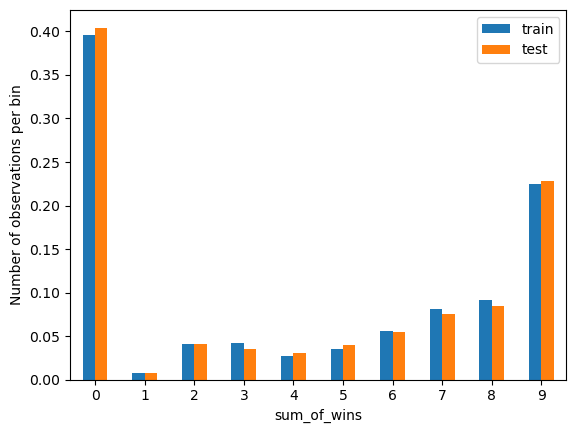

In [107]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

t1 = X_train.groupby(['sum_of_wins'])['sum_of_wins'].count() / len(X_train)
t2 = X_test.groupby(['sum_of_wins'])['sum_of_wins'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Feature Scaling 

#### Standardization

In [108]:
#scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
#scaler.fit(X_train)

# transform train and test sets
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [109]:
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Min Max

In [110]:
#scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
#scaler.fit(X_train)

# transform train and test sets
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [111]:
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#### Robust Scaling

In [112]:
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

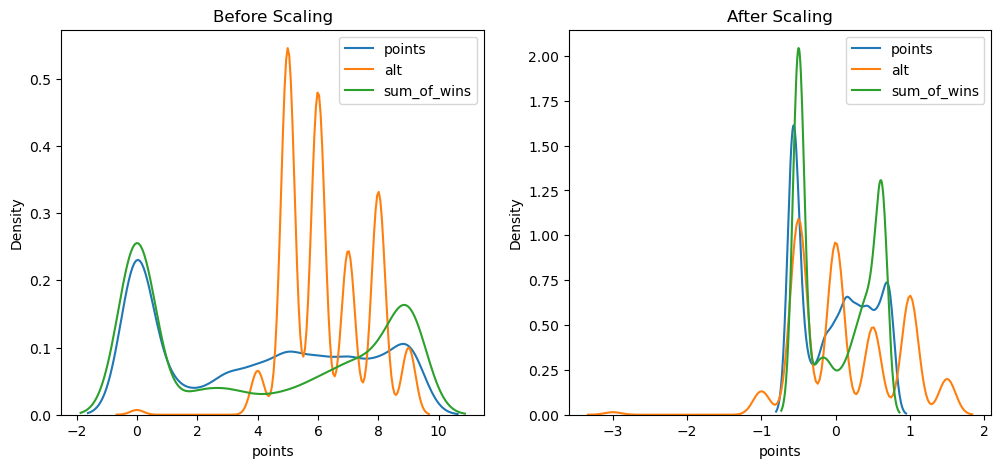

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['alt'], ax=ax1, label ='alt')
sns.kdeplot(X_train['sum_of_wins'], ax=ax1, label ='sum_of_wins')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_scaled['alt'], ax=ax2, label ='alt')
sns.kdeplot(X_train_scaled['sum_of_wins'], ax=ax2, label ='sum_of_wins')
ax2.legend()
plt.show()

### Polynomial Expansion

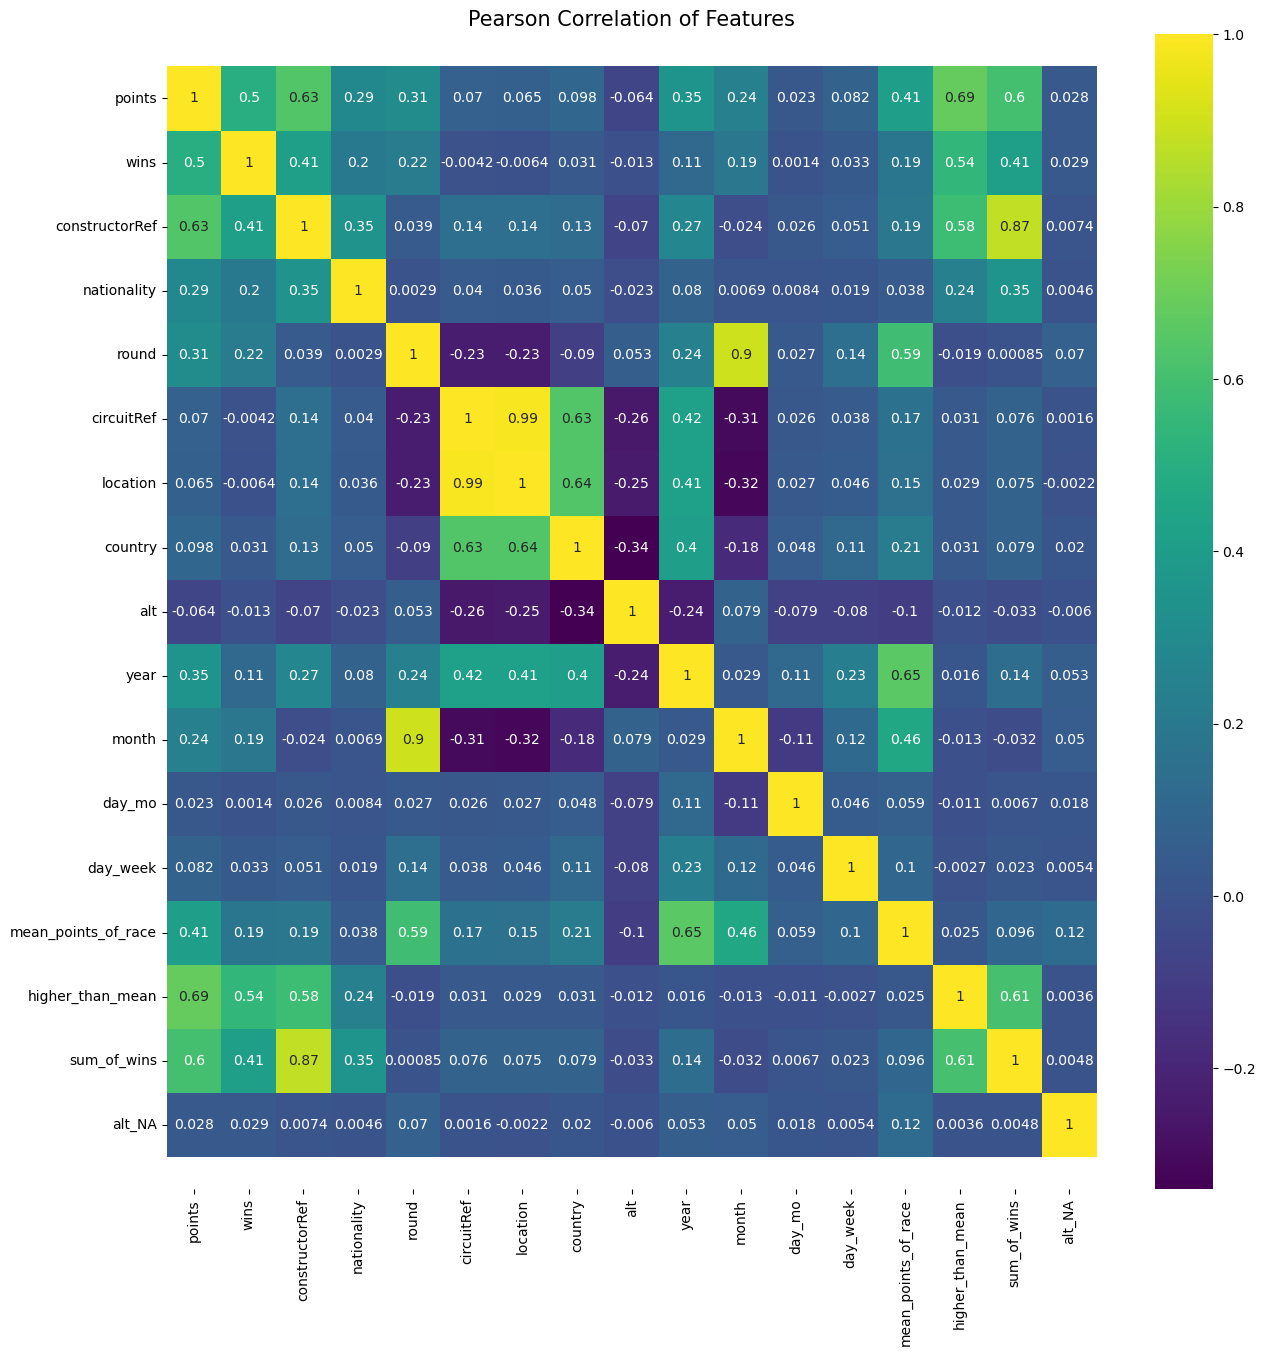

In [115]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(X_train_scaled.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [116]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [117]:
poly.fit(X_train_scaled[['points', 'alt', 'sum_of_wins']])

PolynomialFeatures(degree=3, include_bias=False)

In [118]:
X_train_poly = poly.transform(X_train_scaled[['points', 'alt', 'sum_of_wins']])
X_test_poly = poly.transform(X_test_scaled[['points', 'alt', 'sum_of_wins']])

# [['points', 'alt', 'sum_of_wins']]

In [119]:
X_train_poly = pd.DataFrame(X_train_poly)
X_test_poly = pd.DataFrame(X_test_poly)

# add column names of created features
X_train_poly.columns = poly.get_feature_names_out(['points', 'alt', 'sum_of_wins'])
X_test_poly.columns = poly.get_feature_names_out(['points', 'alt', 'sum_of_wins'])



X_train_poly.head()

,points,alt,sum_of_wins,points^2,points alt,points sum_of_wins,alt^2,alt sum_of_wins,sum_of_wins^2,points^3,points^2 alt,points^2 sum_of_wins,points alt^2,points alt sum_of_wins,points sum_of_wins^2,alt^3,alt^2 sum_of_wins,alt sum_of_wins^2,sum_of_wins^3
0,0.571429,-0.5,0.625,0.326531,-0.285714,0.357143,0.25,-0.3125,0.390625,0.186589,-0.163265,0.204082,0.142857,-0.178571,0.223214,-0.125,0.15625,-0.195312,0.244141
1,-0.571429,-0.5,0.500,0.326531,0.285714,-0.285714,0.25,-0.2500,0.250000,-0.186589,-0.163265,0.163265,-0.142857,0.142857,-0.142857,-0.125,0.12500,-0.125000,0.125000
2,0.142857,-0.5,-0.500,0.020408,-0.071429,-0.071429,0.25,0.2500,0.250000,0.002915,-0.010204,-0.010204,0.035714,0.035714,0.035714,-0.125,-0.12500,-0.125000,-0.125000
3,0.714286,0.0,0.500,0.510204,0.000000,0.357143,0.00,0.0000,0.250000,0.364431,0.000000,0.255102,0.000000,0.000000,0.178571,0.000,0.00000,0.000000,0.125000
4,-0.571429,0.5,-0.500,0.326531,-0.285714,0.285714,0.25,-0.2500,0.250000,-0.186589,0.163265,-0.163265,-0.142857,0.142857,-0.142857,0.125,-0.12500,0.125000,-0.125000


In [120]:
X_train_poly = pd.concat([X_train_scaled,X_train_poly], axis=1)
X_test_poly = pd.concat([X_test_scaled,X_test_poly], axis=1)

In [121]:
X_train_poly.head()

,points,wins,constructorRef,nationality,round,circuitRef,location,country,alt,year,...,points^3,points^2 alt,points^2 sum_of_wins,points alt^2,points alt sum_of_wins,points sum_of_wins^2,alt^3,alt^2 sum_of_wins,alt sum_of_wins^2,sum_of_wins^3
0,0.571429,0.0,1.260855,1.000000,0.8125,0.219098,0.365071,-0.017658,-0.5,0.034483,...,0.186589,-0.163265,0.204082,0.142857,-0.178571,0.223214,-0.125,0.15625,-0.195312,0.244141
1,-0.571429,0.0,0.693427,0.000000,-0.8125,-0.168334,-0.022361,-0.343472,-0.5,-0.034483,...,-0.186589,-0.163265,0.163265,-0.142857,0.142857,-0.142857,-0.125,0.12500,-0.125000,0.125000
2,0.142857,0.0,0.000000,-28.381754,1.0625,0.219098,0.365071,-0.017658,-0.5,0.413793,...,0.002915,-0.010204,-0.010204,0.035714,0.035714,0.035714,-0.125,-0.12500,-0.125000,-0.125000
3,0.714286,1.0,0.826088,-4.895502,0.4375,-0.614785,-0.468812,0.000000,0.0,0.482759,...,0.364431,0.000000,0.255102,0.000000,0.000000,0.178571,0.000,0.00000,0.000000,0.125000
4,-0.571429,0.0,-0.257669,-4.895502,0.8125,0.000000,0.000000,-1.189798,0.5,0.344828,...,-0.186589,0.163265,-0.163265,-0.142857,0.142857,-0.142857,0.125,-0.12500,0.125000,-0.125000


### Principal Component Analysis

In [122]:
#scaling before PCA
scaler.fit(X_train_poly)

# transform train and test sets
X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [123]:
X_train_poly = pd.DataFrame(X_train_poly)
X_test_poly = pd.DataFrame(X_test_poly)

In [124]:
pca = PCA()

In [125]:
pca.fit(X_train_poly)
pca.fit(X_test_poly)

PCA()

In [126]:
X_train_pca = pca.transform(X_train_poly)
X_test_pca = pca.transform(X_test_poly)

In [127]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

36
[7.79437696e-01 1.52608605e-01 1.62648121e-02 1.00768373e-02
 9.10366315e-03 6.49255250e-03 5.76616592e-03 3.72926567e-03
 2.84021592e-03 2.11971481e-03 1.86998473e-03 1.43723504e-03
 1.32826537e-03 9.55392293e-04 9.04903170e-04 8.35517688e-04
 6.59829407e-04 6.01411207e-04 5.62582440e-04 4.74590767e-04
 3.94772426e-04 3.87274285e-04 3.12747114e-04 2.38559973e-04
 1.45439241e-04 1.19753864e-04 1.13667593e-04 8.05759997e-05
 5.85597396e-05 3.64987152e-05 2.73452037e-05 1.43391475e-05
 1.22627218e-06 1.81703076e-31 1.02700490e-31 6.02658237e-33]


Text(0, 0.5, 'Percentage of Variance Explained')

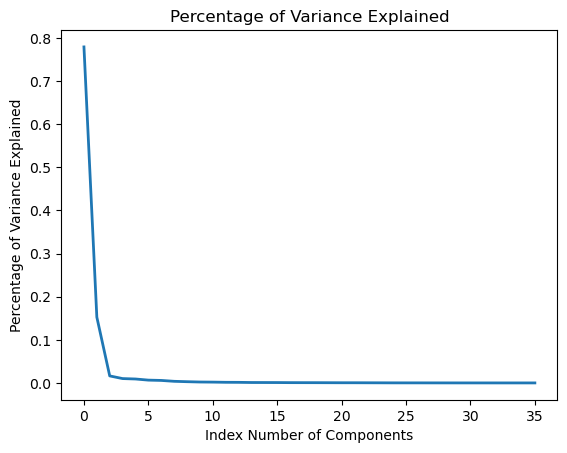

In [128]:
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

The first component makes up 77.9% of variance, the first 5 components make up 95% of the variance. The remaining principal components make up less than 0.8% of variance

In [129]:
pca = PCA()

In [130]:
pca.fit(X_train_poly)
pca.fit(X_test_poly)

PCA()

In [131]:
X_train_final = pca.transform(X_train_poly)
X_test_final = pca.transform(X_test_poly)

In [132]:
print(len(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

36
[7.79437696e-01 1.52608605e-01 1.62648121e-02 1.00768373e-02
 9.10366315e-03 6.49255250e-03 5.76616592e-03 3.72926567e-03
 2.84021592e-03 2.11971481e-03 1.86998473e-03 1.43723504e-03
 1.32826537e-03 9.55392293e-04 9.04903170e-04 8.35517688e-04
 6.59829407e-04 6.01411207e-04 5.62582440e-04 4.74590767e-04
 3.94772426e-04 3.87274285e-04 3.12747114e-04 2.38559973e-04
 1.45439241e-04 1.19753864e-04 1.13667593e-04 8.05759997e-05
 5.85597396e-05 3.64987152e-05 2.73452037e-05 1.43391475e-05
 1.22627218e-06 1.81703076e-31 1.02700490e-31 6.02658237e-33]


In [133]:
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

### Final Scaling

In [134]:
scaler.fit(X_train_final)

# transform train and test sets
X_train_final = scaler.transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

In [135]:
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)
#, columns=X_test_final.columns)

In [136]:
X_train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-1.004379,0.612185,-0.718317,-0.473299,0.532894,0.189591,-0.796587,0.852507,-1.815743,0.445889,...,0.247348,-0.836303,0.056965,-0.048732,0.225258,0.935900,0.103380,-0.773551,0.601569,7.061413e-16
1,0.002061,0.375136,0.251415,-0.141117,0.608796,0.362913,-0.166797,0.334407,-0.635724,-0.149665,...,0.537656,0.159448,0.736078,-0.485424,-0.904901,-0.596684,0.743537,0.463763,-0.679162,-2.068978e-17
2,25.973455,0.620900,-0.411930,-0.264685,-0.375029,-0.192018,0.008948,-0.390220,-0.283899,0.045868,...,0.862278,-0.770044,-0.649509,0.414973,-0.448194,0.499827,0.936043,-0.206690,0.315795,-1.945267e-19
3,4.388685,0.098455,-0.848025,0.326648,-0.514485,0.084120,-0.538688,0.614184,-0.789798,0.619952,...,0.513270,1.406544,-1.196925,0.865585,0.242076,-0.979769,-2.419250,-0.761717,0.794892,-5.441422e-16
4,4.564107,-0.497384,0.336780,0.326486,-0.977770,-0.288945,0.401127,0.452875,0.075805,-1.284502,...,-0.001655,-0.303375,-0.402450,1.340585,0.064975,0.248104,-0.309992,0.707561,-0.657934,7.574114e-16


## Step 4: Machine Learning Modelling

In [137]:
X_train_final.shape

(8826, 36)

### Naive Baseline Model

In [138]:
modal_class_label = stats.mode(y_train)[0]
y_train_preds_naive = [int(modal_class_label) for row in X_train_final.iloc[:,0]]
y_train_preds_naive[0:5]

C:\Users\marke\AppData\Local\Temp\ipykernel_41792\2325645360.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modal_class_label = stats.mode(y_train)[0]


[0, 0, 0, 0, 0]

In [139]:
y_test_preds_naive = [int(modal_class_label) for row in X_test_final.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [140]:
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 52.83%.
The Naive Baseline Model's accuracy on test data is 54.06%.


### Logistic Regression

In [141]:
logreg = LogisticRegression(random_state=16)

In [142]:
logreg.fit(X_train_final, y_train)

C:\Users\marke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [143]:
y_train_preds_logreg = logreg.predict(X_train_final)
y_test_preds_logreg = logreg.predict(X_test_final)

In [144]:
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 91.30%.
The LogReg Model's accuracy on test data is 91.25%.


## Report

### Table of Contents

- [Introduction with Value Based Problem Statement](#introduction)
- [Problem Formulation](#formulation)
- [Data Wrangling on multiple tables](#multipletables)
- [Data Cleansing and Transformation](#cleansing)
- [Machine Learning Model](#model)
- [Summary and Further Improvements](#summary)

### Introduction with Value Based Problem Statement

For this assignment, I did it from the perspective of a data scientist in a sports beverage company (like Monster or Red Bull). Due to the popularity and extremeness of Formula 1, the company is currently looking to sponsor an F1 team and expand its sports roster. From this sponsorship, The company intends to increase its brand awareness and potentially grow its market share.The company’s management wants to choose a top-performing Formula 1 team as the team’s success will bring better brand recognition and association for the company. 

Hence, the company has assigned the data scientists to come up with a model to predict the top teams in future races so that the company is able to decide based on the model, the team with great potential in future races to invest in. 


### Problem Formulation

• Load and Explore the Data <br>
• Understand the Data <br>


Since I was coding a model that was predicting teams, I decided to use constructor-related tables.

When going through the tables and data dictionary and researching more about F1, I found some information that may affect the data-wrangling process. For example, the time stated in the race circuit was not in the local circuit location’s time but instead was in UTC, which is the local time in England. This means that I could not actually determine what time the race started at the circuit location. For example, the time states that the race happened at 12 pm for the Singapore Grand Prix, but the race actually happened at 8 pm in Singapore time.

Another one was that constructors can only employ 2 drivers currently, but in the early 1950s and 60s, there were no limits on the number of drivers. This could make it difficult to determine the number of drivers the team has for each race and find information about them.

After looking through data dictionary and the different tables, I was interested in the following tables and columns:

‘circuits_mod’: circuitRef, Location, country, alt <br>
    -	These features help provide further details about the circuit. They display the different circuit locations and altitudes which may play a part in determining how a team performs. 
    
‘constructors_mod’: constructorRef, nationality <br>
    -	These features provide details of the constructors. The nationality of the constructor might matter as it is possible that some constructors perform better at home compared to foreign circuits.
    
‘races_mod’: date <br>
    -	The date of the race might affect the environmental factors. For example, months later in the year typically see colder weather and possibly snow. This affects the teams and drivers’ situation and performance.
    
‘constructors_standing_mod’: position, wins <br>
    -	Position can be our target variable and used to create the target column. Wins help us how successful a team is overall, which might help us determine the top teams in future races.
    
I also wanted to use qualifying, driver and status tables however drivers were not grouped together by the constructor in each race which made it hard to extract the status and timings of the drivers in each team. 

• Formulate a Prediction Problem <br>

After going through the data, I decided to predict the top 6 constructors based on position. For this problem, I used classification where we set the top 6 to be indicated by 1 and the rest to be indicated by 0. I eventually chose my machine learning model to be binary logistic regression.

### Data Wrangling on multiple tables

• Concatenate, Merge or Join the tables <br>

So, the tables I used were ‘circuits_mod’, ‘constructors_data’, ‘races_data’ and ‘constructors_standings_mod’. 

I merged all these tables by using an inner merge. Afterwards, I dropped columns that I decided cannot be used or were repeats of other columns. The unusable columns were URL and time. URL was unusable as it was just a Wikipedia link and time could not be used as it was in UTC as explained above. 
Next, I dropped repeated columns such as positionText, lat, lng and name as all these columns could already be represented by other columns in the dataset. 

• Extract and Create features from different tables 

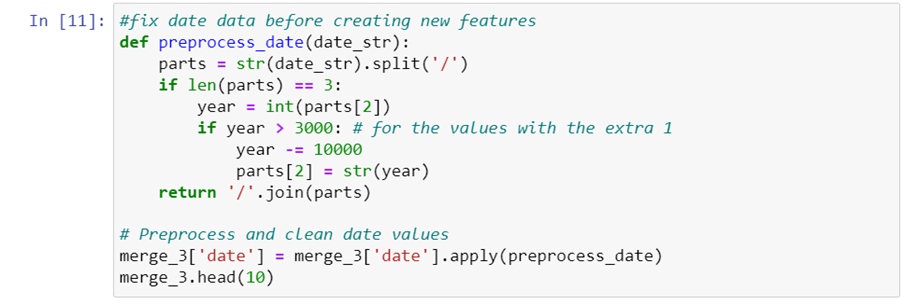

Figure 1: Date Processing Function

Firstly, I had to clean the data in the date column before I could extract any features from it. The date column had some values where there was an additional 1 in front of the year. For example, ’4/5/12009’ has an extra 1 in front of 2009. Because of this, I had to preprocess the data first. I created the function in Figure 1 which splits the date into three parts, before taking the third part (the year) and checking if it was greater than 3000 (which would show it had an extra 1), I then deducted 10000 from the year to remove the 1 and returned the whole date. 

Since the date column was now clean, I converted the column to Datetime and extracted the year, month, day of the month and day of the week. 

Next, I aggregated the average points for each race. I grouped the races by raceID and found the average points. I then converted it into a data frame and merged it with my current one, forming a new mean_points_of_race column. Using the new column, I compared the points of each row to the corresponding average of the race. If the points were greater than the mean, a 1 will be indicated else it would be a 0. If a team performs better than the average points in the race, it may indicate that the team is doing better than at least half of the competition, which can help predict if they will be the top team. 

Next, I summed the number of wins for each constructor. I grouped the constructors by constructorID and summed the number of wins through the ‘wins’ column. I converted it into a dataframe and merged it with my current one, forming a new sum_of_wins column. By summing the wins of each constructor, we can see how successful a team is overall. A successful team may have a higher probability of being in the top 6 teams for future races which helps the model predict. 


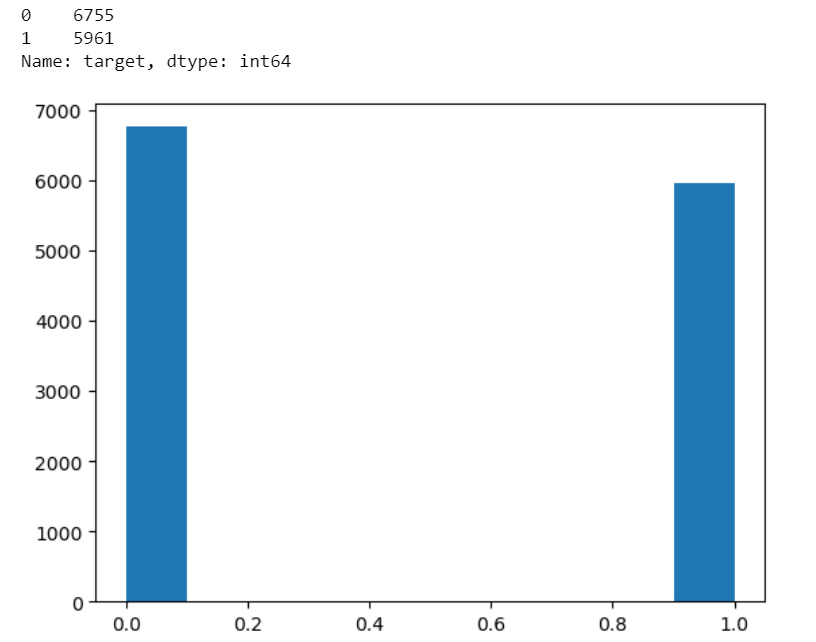

Figure 2: Ratio of 0s to 1s

Next, I created the target variable column. If the teams’ position was <= 6th, a 1 would be indicated else 0. The dataset was quite balanced as seen in Figure 2, with the ratio of 0s to 1s being 6755 : 5961

Lastly, I dropped the position and ID columns. Position was used to create my target column hence it should not be added to the model. ID columns such as circuitId and raceId were dropped because they could either be replaced by the unique identifier Ref columns or were not relevant to the model. This helps reduce noise and unnecessary complexity in the dataset. 

### Data Cleansing and Transformation

• Missing Value and Outliers <br>

For missing values, a very small portion of data was missing from the alt and date variables columns. For the date variables, I decided to drop the rows. There was less than 0.85% of the data missing hence I just dropped it. Dropping was also the only way I could deal with the missing date values. Datetime is typically not used in the same way as numerical values hence mean and median imputation was not recommended. Mode date could also not be used as each race has a unique date. Forward and backward interpolation also does not work as the dates were not in chronological order.

For the alt column, it had ‘\N’ values which meant unclassified, which is technically null. So I converted all the ‘\N’ values to np.nan first before cleaning. For alt I tried median and random sampling, both methods seem have the same model performance. I just chose to do median imputation as it was more consistent.

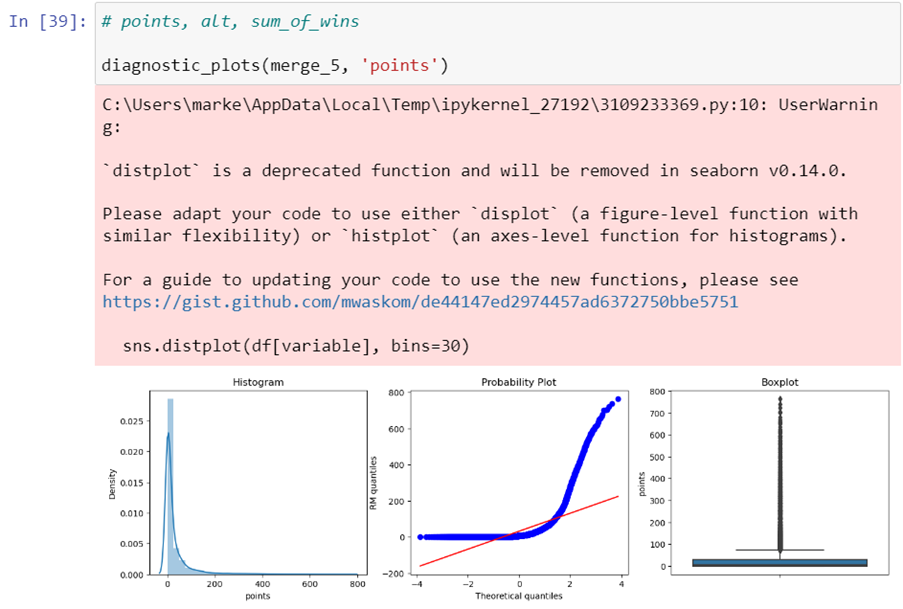

Figure 3: Diagnostic Plot of 'points' feature before outlier cleaning

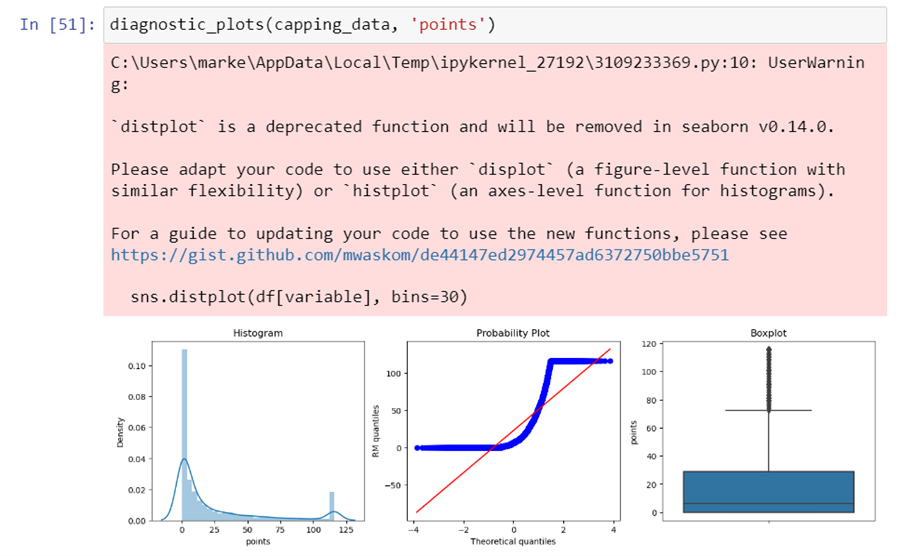

Figure 4: Diagnostic Plot of 'points' feature after outlier cleaning

I did outlier cleaning on variables: points, alt, sum_of_wins.

For example in the diagnostic plot on points in Figure 3, we can see that points had a lot of outliers and an extremely positively skewed distribution. We can see from the QQ plot that the distribution is very far from a normal distribution. Outliers can affect the performance of the machine learning models by skewing model parameters hence it is important to clean them.

For outliers, I tried trimming, windsorization and capping. Trimming was not suitable due to the number of rows it removed. Trimming removed 1425 rows out of 12609 which was losing around 10% of the total rows. Due to the amount of data that would be lost, I decided not to use trimming. For windsorization and capping, since the distribution is skewed for all the features, both methods used the IQR capping methods. When comparing model performance, capping sees a slightly better LogReg model performance than windsorization hence I decided to use capping. 

Afterwards, in Figure 4, we can see that the number of outliers has reduced significantly for 'points' after cleaning and that the QQ plot shows a normal distribution of data

• Categorical Data 

Firstly, I created rare categories for categorical features with more than 40 unique values. For the features I grouped, I set the threshold percentage to 1%. Next, I tried encoding methods to transform the strings into numbers before entering the model. I tried Ordered Ordinal and Target Mean encoding. Target mean encoding performed slightly better than Ordered Ordinal Encoding in terms of the LogReg Model accuracy score. 


• Numerical Data

First, I tried to transform the data using Power and Yeo-Johnson transformers. Logarithm, Reciprocal and Box-Cox transformers could not be used as there were negative and zero values in ‘alt’. When trying the Power transformer, the transformer kept returning null values to me due to the negative values in alt. I tried different exponential values, but all returned null values. Hence, I could only use Yeo-Johnson. 

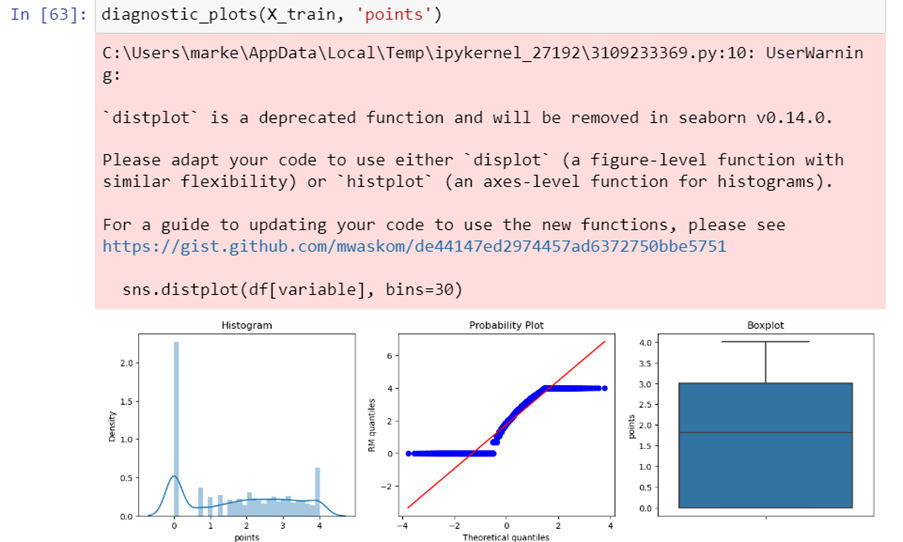

Figure 5: 'points' feature after numeric transformation 

As seen from Figure 5, QQ plot shows a normal distribution. The transformation further ensured that the distribution was normal and decreased outliers. 

Next, I did variable binning and discretization on points, alt and sum_of_wins. The features had skewed distributions as seen in Figure 5 hence I performed binning and discretization. I tried Equal Frequency, Discretization plus Encoding and Equal Width Frequency. Equal Width Frequency was by far the best out of the 3 in terms of LogReg model score. 

 • Others
 
I also did feature scaling and engineering. Firstly, I scaled the data with different methods. I used Standardization, Min-Max Normalisation and Robust Scaling. Robust Scaling performed the best out of the three in terms of LogReg performance. 

Next, I did Polynomial Expansion on points, alt and sum_of_wins. Polynomial Expansion seemed to increase the predictive power as the LogReg model performance improved slightly. 


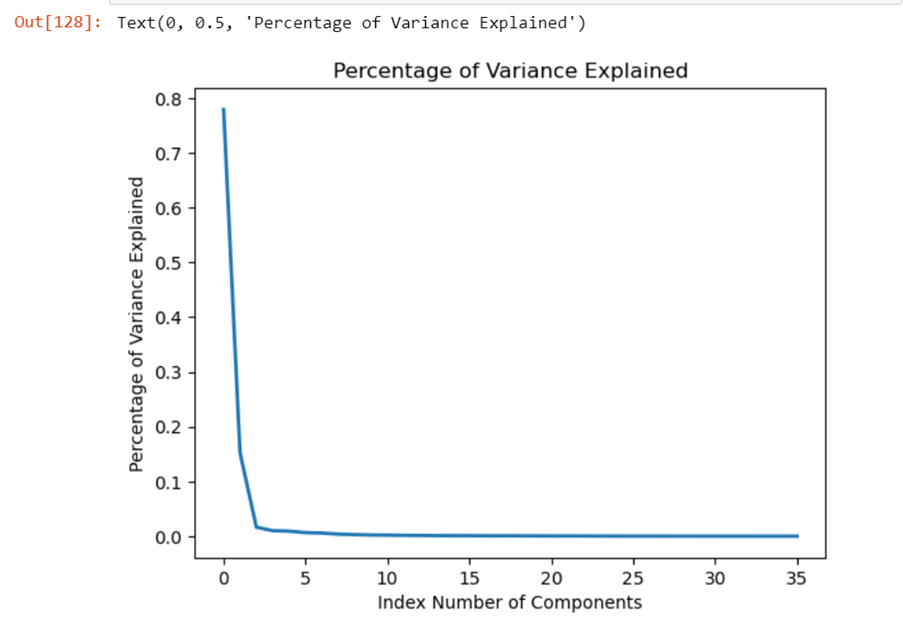

Figure 6: PCA Analysis

Lastly, I did PCA. I scaled the features once more before doing PCA. As seen in Figure 6, the analysis showed that the first component made up 77.9% of the variance, with the first 5 components making up 95% of the variance. The remaining components each made up less than 0.8% of the variance. I found that reducing components seemed to negatively impact LogReg model performance, hence I chose not to reduce the components. 

### Machine Learning Model
• Show Count of Rows and Columns 

The final training dataset had 8826 rows and 36 columns

• Build and Evaluate the model against a Naïve Baseline Model

As my target variable was between 1 and 0, I used a binary logistic regression model. 

What is Naïve Baseline Model? 

Naïve models are usually fitted on a training dataset and evaluated on a test dataset, the performance of the model is usually reported as a percentage of the number of correct predictions compared to the total number of predictions made, also known as accuracy. The models are naïve because they do not use knowledge about the domain or any learning to make predictions hence, they lack predictive power. However, due to their simplicity, they are often used as a benchmark for trained models. If the model does not surpass the baseline model’s performance on the data, the entire process must be reevaluated.

Comparing LogReg and Naïve Baseline

The accuracy score for the Naïve Baseline was 52.83% for train data and 54.06% for test data. The logistic regression model saw much better results, with accuracy scores being 91.30% on training data and 91.25% on test data. Since the Logistic Regression model performed better than the naïve baseline model, the Logistic Regression model demonstrated that it has skill on the prediction problem. Hence, the model can be used to predict the top 6 constructors in terms of position in future races. 


### Summary and Further Improvements

My prediction problem: Predicting the Top 6 Constructors in terms of position for future races.

After data exploration, I decided to use the circuits_mod, constructors_mod, races_mod and constructor_standings_mod tables. I used inner merge to combine the tables and dropped columns that were either unusable or could be represented by other columns. I also created additional features from the cleaned Date values, as well as a higher_than_mean indicator and a sum_of_wins column. 
I then created a target variable indicating position <= 6 to be 1 while the rest were 0. The dataset had a relatively good balance of 0s to 1s. Lastly, I dropped ID columns that could either be replaced by Ref columns or were not relevant to the model.

For data cleansing and transformation, I dropped rows for missing Date data and did median imputation for missing alt values. For outlier cleaning, I used Capping as it performed slightly better than Windsorization. For numerical variables, I used Yeo-Johnson as the numeric transformer and Equal Width Frequency for binning and discretization as it performed the best out of the 3 I tested.

For categorical data, I grouped the rare categories for features with more than 40 values and used Target Mean Encoding as it performed better than Ordered Ordinal Encoding.  For feature scaling, Robust Scaling performed the best of the 3 I tried. Polynomial Expansion improved my model performance slightly while reducing principal components in PCA seemed to negatively impact my model score.

When evaluating the model, the Logistic Regression scores were significantly better than the Naïve Baseline model scores, showing that the LogReg model could be used to effectively predict the Top 6 Constructors. 

For further improvements, I could try to use more include more datasets. Datasets that include weather data, car model data and team staff data for example will provide me with much more information to increase the predictive ability of the model and improve model accuracy scores. I could also try and compare with other Machine Learning models such as Probit Regression and Decision Trees to evaluate my data wrangling process. 
